Group: Seunghyeon (Hyeon) Kim

1) consider a gene either unregulated, positively or negatively regulated by the protein it encodes (Fig 1. of the Uri Alon review).



1a) perform a parameter sensitivity analysis: starting from the initial parameter values, create 100 simulations by varying the model parameters randomly. Each parameter should be chosen from a logarithmic grid of e.g., 20% increments/decrements. The variable analyzed could be the steady state value of the simulation: verify it the simulation indeed reaches a steady state by the end! Show that negative autoregulation can decrease the parameter-dependent spread of the steady state values.



1b) perform a sensitivity analysis for the initial condition. Identify fixed points -- the steady state that the system reaches from a set of initial conditions. That sets constitutes the basin of attraction of the fixed point. For certain parameters the positive autoregulation may exhibit two fixed points.



2a) pick a coherent feed-forward loop from Figure 2 and understand its behavior. Alternatively, reproduce the results of Figures 3 or 4.



2b) create a feed-forward network similar to the one shown in Fig 7c and understand/reproduce its reported behavior.

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')

TOFFSET = 0
TSCALE = 0.1
TSPAN = 90

<ipython-input-88-c7df07dc7dc0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [89]:
x_toggle = np.array([4,10,40,70])
time_tape = np.arange(TOFFSET,TSPAN+.1+TOFFSET,TSCALE)

In [90]:
def index(t):
  return int(((t-TOFFSET)/TSCALE))

x = np.zeros(len(time_tape))
i = 1
for eachI in x_toggle:
    x[time_tape>eachI] = i
    i += 1
    i%=2
def toggle (t):
  return x[index(t)]


In [91]:
def plotnd(sol, n):
  plt.figure(figsize=(12*n,4))
  plt.subplot(130+10*(n+1)+1)
  plt.plot(time_tape, x)
  plt.plot(sol.t,sol.y[3])
  plt.xlabel('t')
  plt.ylabel('x'+str(3))
  plt.plot(sol.t,sol.y[8])
  plt.xlabel('t')
  plt.ylabel('x'+str(8))

  plt.tight_layout()
  plt.show()

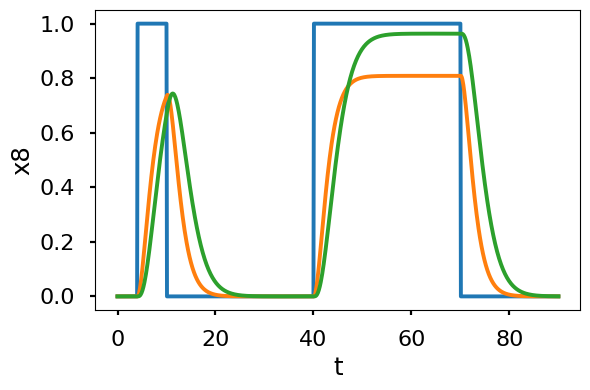

In [92]:
def diffEq (t, s):
  alpha = [0.6 for i in range(9)]
  beta = [0.7 for i in range(9)]
  delta = [0.8 for i in range(9)]
  X = toggle(t)
  D_Y,XD_Y,mY,Y,D_Z,XD_Z,YD_Z,mZ,Z = s[0], s[1], s[2], s[3], s[4], s[5], s[6], s[7], s[8]
  return [
      alpha[0]-delta[0]*D_Y, # dD_Y/dt
      alpha[1]*D_Y*X-delta[1]*XD_Y,
      alpha[2]*XD_Y+beta[2]*D_Y*X-delta[2]*mY, #dmY/dt
      alpha[3]*mY-delta[3]*Y, #dY/dt
      alpha[4]-delta[4]*D_Z,
      alpha[5]*D_Z*X-delta[5]*XD_Z,
      alpha[6]*D_Z*Y-delta[6]*YD_Z,
      alpha[7]*YD_Z+beta[7]*mY-delta[7]*mZ, #dmZ/dt
      alpha[8]*mZ-delta[8]*Z #dZ/dt
  ]

sol = solve_ivp(diffEq, t_span=[TOFFSET,TOFFSET+TSPAN], y0=[0,0,0,0,0,0,0,0,0], t_eval=time_tape, atol=1e-8, rtol=1e-8)
plotnd(sol, 3)

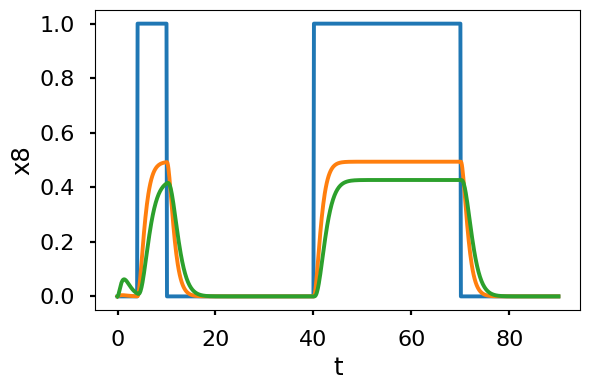

In [93]:
def diffEq1 (t, s):
  alpha = [1 for i in range(9)]
  beta = [1 for i in range(9)]
  delta = [1.5 for i in range(9)]
  X = toggle(t)
  D_Y,XD_Y,mY,Y,D_Z,XD_Z,YD_Z,mZ,Z = s[0], s[1], s[2], s[3], s[4], s[5], s[6], s[7], s[8]
  return [
      alpha[0]-delta[0]*D_Y, # dD_Y/dt
      alpha[1]*D_Y*X-delta[1]*XD_Y,
      alpha[2]*XD_Y+beta[2]*D_Y*X-delta[2]*mY, #dmY/dt
      alpha[3]*mY-delta[3]*Y, #dY/dt
      alpha[4]-delta[4]*D_Z,
      alpha[5]*D_Z*X-delta[5]*XD_Z,
      alpha[6]*D_Z*Y-delta[6]*YD_Z,
      alpha[7]*YD_Z+beta[7]*mY-delta[7]*mZ, #dmZ/dt
      alpha[8]*mZ-delta[8]*Z #dZ/dt
  ]

sol = solve_ivp(diffEq1, t_span=[TOFFSET,TOFFSET+TSPAN], y0=[0.01,0.02,0.01,0,0.1,0,0.5,0,0], t_eval=time_tape, atol=1e-8, rtol=1e-8)
plotnd(sol, 3)